In [131]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import *
import scipy.integrate as integrate


## Построение графика совместной плотности

In [93]:
#матрица ковариаций
cov_matrix = [[10, 8],
            [8, 10]]
#вектор матожей
a = [1, 4]
distr = multivariate_normal(a, cov_matrix, (3, 3)) 

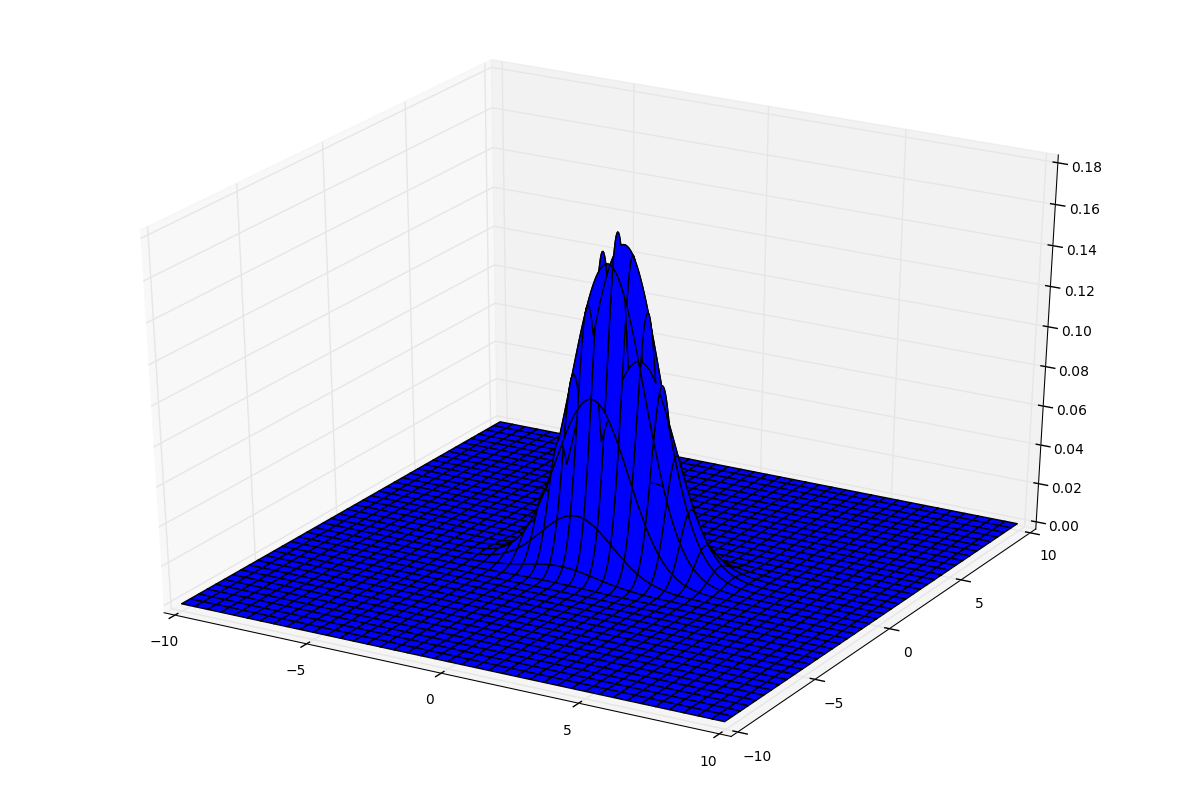

In [105]:
x, y = np.mgrid[-10:10:.05, -10:10:.05]
pos = np.empty(x.shape + (2,)) #сетка
pos[:, :, 0] = x; pos[:, :, 1] = y
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, rv.pdf([pos]),  shade=False)
plt.show()

In [101]:
# Условная плотность
def cond_distr(x, y, a, cov_matrix):
    return multivariate_normal.pdf([x,y], a, cov_matrix) / (norm.pdf(y, loc=a[1], scale=sqrt(cov_matrix[1][1])))

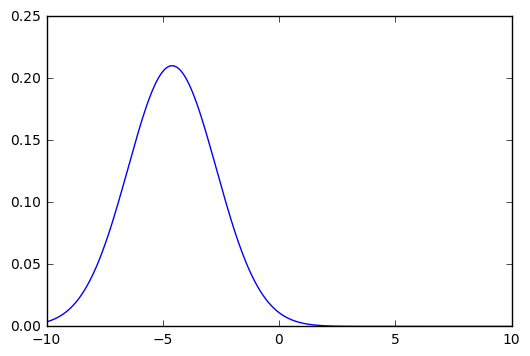

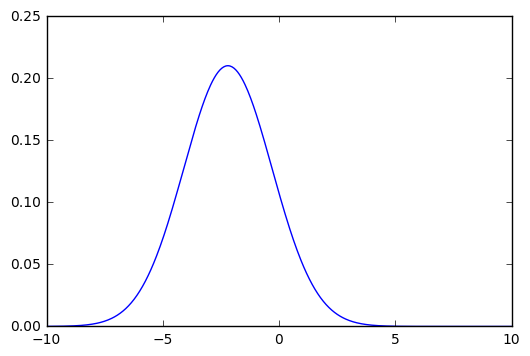

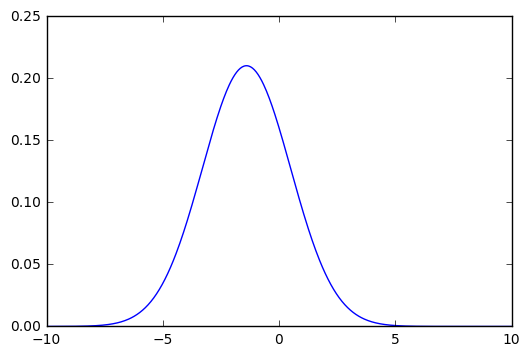

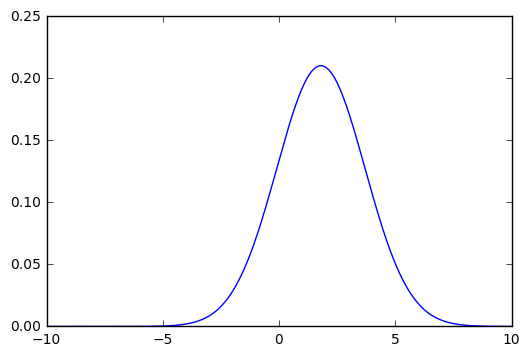

In [130]:
y_arr = [-3,0,1,5]
bins = linspace(-10, 10, 500)
# Графики условной плотности
for i in range(len(set_of_y)):
    plt.figure()
    distr_tmp = []
    for x in bins:
        distr_tmp += [cond_distr(x,y_arr[i],a,cov_matrix)]
    plot(bins, distr_tmp)    
plt.show()

In [139]:
# Условное матожидание
def E(y, a, cov_matrix):
    return (integrate.quad(lambda x: x * cond_distr(x, y, a, cov_matrix),-10,10))[0]

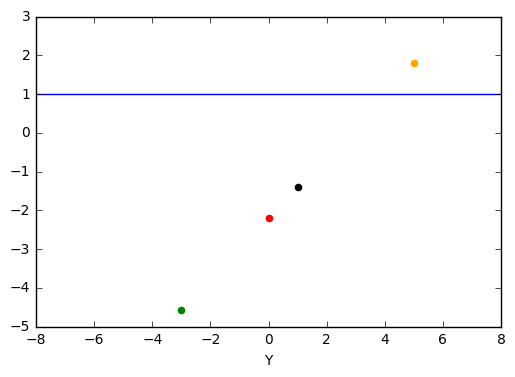

In [168]:
plt.figure()
xlabel('Y')
xlim(-8,8)
plt.scatter(y_arr[0], E(y_arr[0], a, cov_matrix), color='g')
plt.scatter(y_arr[1], E(y_arr[1], a, cov_matrix), color='r')
plt.scatter(y_arr[2], E(y_arr[2], a, cov_matrix), color='black')
plt.scatter(y_arr[3], E(y_arr[3], a, cov_matrix), color='orange')
plt.plot([-8,8],[1,1], color='blue', label="s")
plt.show()